In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats
import networkx as nx

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

import matplotlib
#matplotlib.use('Agg')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'

In [2]:
mcmc = mcmc_data(count_matrix_fn='data/e13_5_mouse_forebrain_neuron_diff.2.raw_count_matrix.tsv',
                          pkl_dir='outputs_full/e13_5_forebrain_dorsal_2/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500


In [3]:
gene_map = {}
gene_map_r = {}
for gene in mcmc.counts_dict:
    gene_map[gene.split("|")[1]] = gene
    gene_map_r[gene] = gene.split("|")[1]

In [4]:
human_tfs = [y[0]+y[1:].lower() for y in [x.strip("\n") for x in open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/data/transcription_factors_lambert_et_al.txt','r').readlines()]]
mcmc.tfs = [gene_map[x] for x in human_tfs if x in gene_map]

In [5]:
gene = gene_map['Jun']

In [6]:
len(mcmc.dic_dict)

9530

In [7]:
mcmc.best_fits[gene]

'double sigmoidal'

In [8]:
sig_genes = {'dic':[],'bic':[],'aic':[],'bic_mode':[],'bic_subsets':[]}
for gene in mcmc.dic_dict:
    if min([mcmc.dic_dict[gene][x] for x in ['gauss','sigmoidal','double sigmoidal']]) < mcmc.dic_dict[gene]['uniform']:
        sig_genes['dic'].append(gene)
for gene in mcmc.aic_avg_params:
    if min([mcmc.aic_avg_params[gene][x] for x in ['gauss','sigmoidal','double sigmoidal']]) < mcmc.aic_avg_params[gene]['uniform']:
        sig_genes['aic'].append(gene)
for gene in mcmc.bic_avg_params:
    if min([mcmc.bic_avg_params[gene][x] for x in ['gauss','sigmoidal','double sigmoidal']]) < mcmc.bic_avg_params[gene]['uniform']:
        sig_genes['bic'].append(gene)
for gene in mcmc.bic_mode_liks:
    if min([mcmc.bic_mode_liks[gene][x] for x in ['gauss','sigmoidal','double sigmoidal']]) < mcmc.bic_mode_liks[gene]['uniform']:
        sig_genes['bic_mode'].append(gene)
for gene in mcmc.best_fits:
    if mcmc.best_fits[gene] != 'uniform':
        sig_genes['bic_subsets'].append(gene)

In [9]:
len(sig_genes['dic']),len(sig_genes['aic']),len(sig_genes['bic']),len(sig_genes['bic_mode']),len([x for x in mcmc.best_fits if mcmc.best_fits[x] != 'uniform'])

(4352, 3836, 2470, 2523, 722)

popt: 7.448428927081646


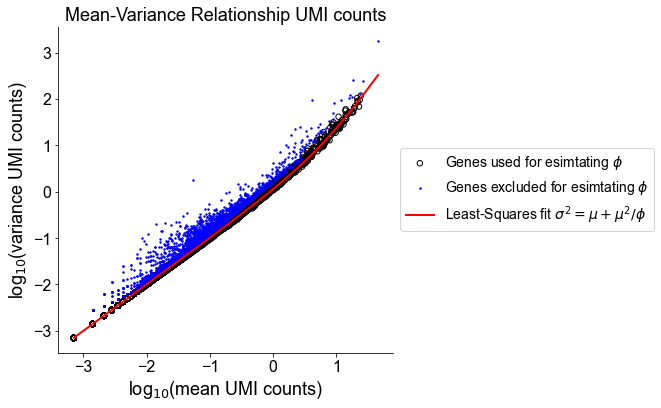

In [10]:
fig = make_mean_var_relationship_plot(mcmc)
plt.savefig('figures_paper_mouse_data/supp_figures/mean_var_neg_binom_fit.pdf',bbox_inches='tight')

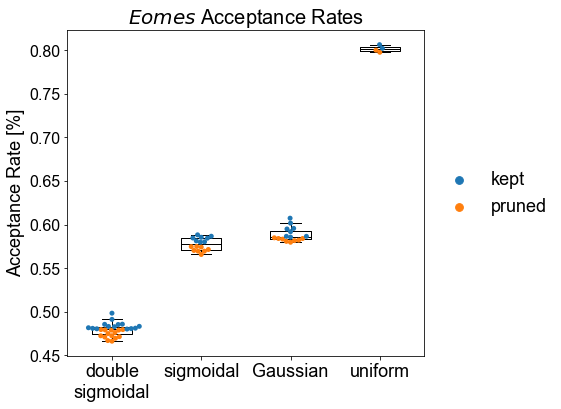

In [11]:
gene = gene_map['Eomes']
fig = make_acceptance_fraction_plot(mcmc,gene,gene_lab=r'$\it{'+gene_map_r[gene]+'}$')
plt.savefig('figures_paper_mouse_data/supp_figures/eomes_acceptance_rates.pdf',bbox_inches='tight')

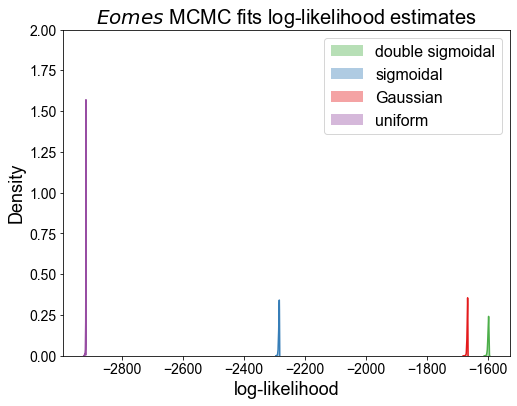

In [12]:
fig = make_lik_hist_plot(mcmc,gene,gene_lab=r'$\it{'+gene_map_r[gene]+'}$')
plt.savefig('figures_paper_mouse_data/supp_figures/eomes_log_likelihood_fit_distributions.pdf',bbox_inches='tight')

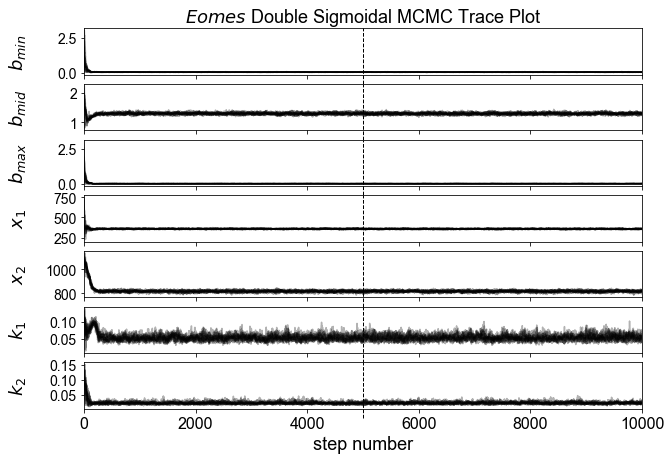

In [14]:
fig = make_mcmc_trace_plot(mcmc,gene,mcmc.best_fits[gene],gene_lab=r'$\it{'+gene_map_r[gene]+'}$',n_discard=5000,sub_not_include=True)
plt.savefig('figures_paper_mouse_data/supp_figures/eomes_double_sigmoidal_mcmc_trace.pdf',bbox_inches='tight')

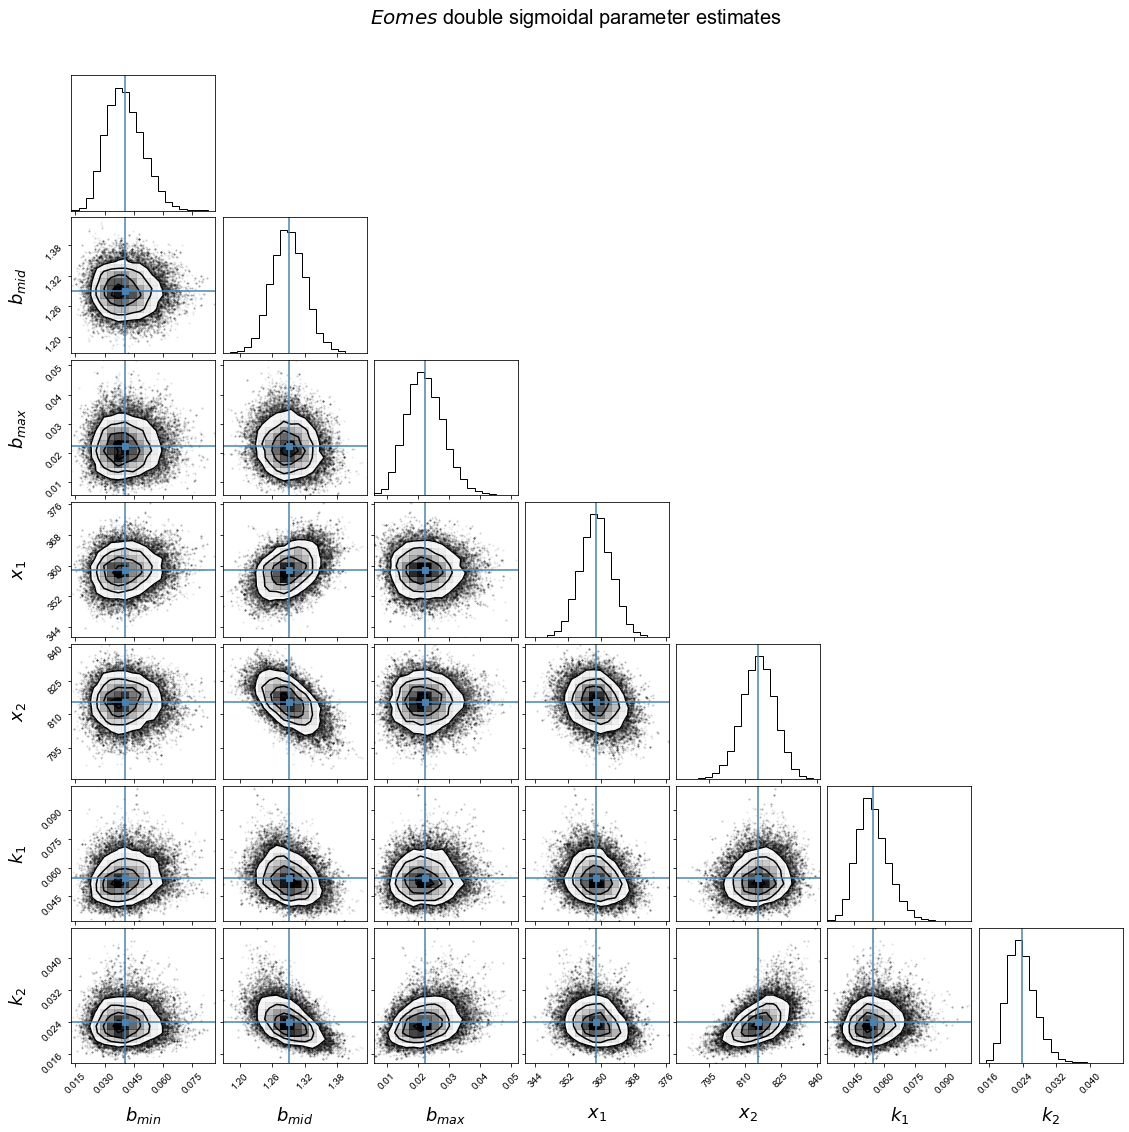

In [15]:
fig = make_corner_plot(mcmc,gene,'double sigmoidal',n_discard=5000,use_max_args=True,gene_lab=r'$\it{'+gene_map_r[gene]+'}$')
plt.savefig('figures_paper_mouse_data/supp_figures/eomes_corner_plot.pdf',bbox_inches='tight')

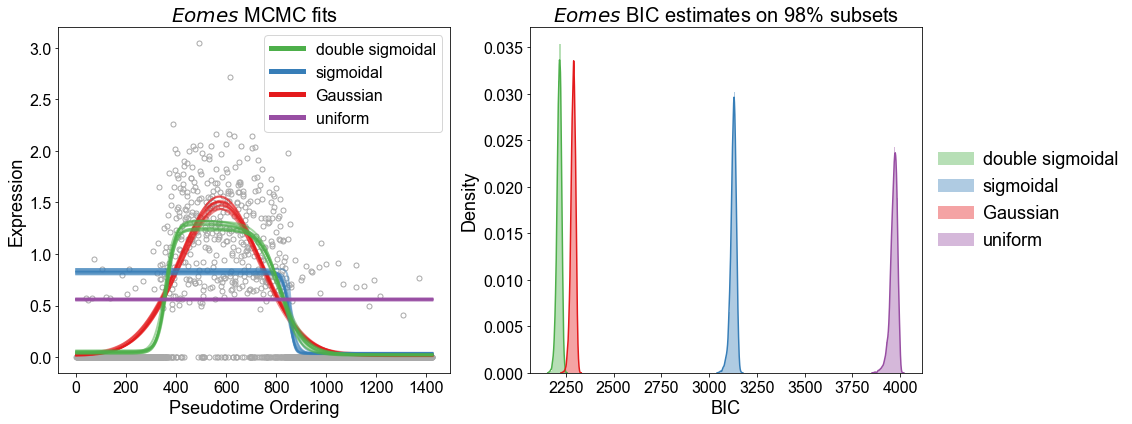

In [16]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene,gene_lab=r'$\it{'+gene_map_r[gene]+'}$')
plt.savefig('figures_paper_mouse_data/supp_figures/eomes_mcmc_fits_and_bic_estimates.pdf',bbox_inches='tight')

0 5
1 5
2 5
3 5
4 5


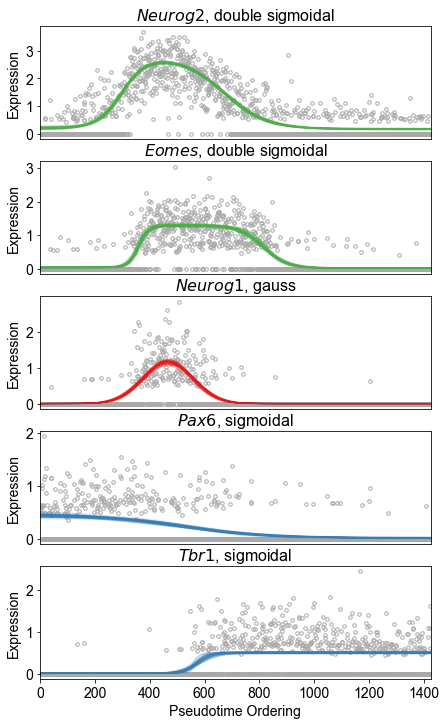

In [17]:
gene_list = ['Neurog2','Eomes','Neurog1','Pax6','Tbr1']
fig = make_inflec_point_comp_plot_2(mcmc,[gene_map[gene] for gene in gene_list],
                                    gene_list_title=[r'$\it{'+gene+'}$' for gene in gene_list],
                                    figsize=(7,12))#,ylim=[-0.1,3.1])
plt.savefig('figures_paper_mouse_data/fig1/fits.pdf',bbox_inches='tight')

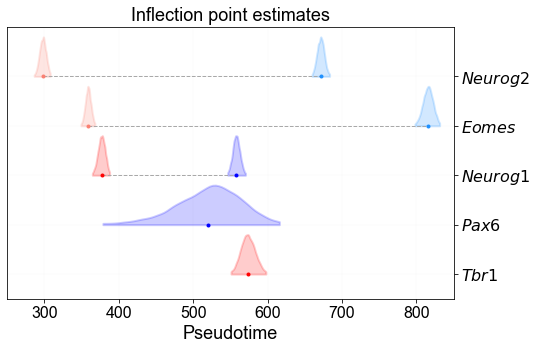

In [18]:
tfs_sub = [gene_map['Neurog1'],gene_map['Neurog2'],gene_map['Eomes'],gene_map['Pax6'],gene_map['Tbr1']]
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(8,5), tfs=tfs_sub, height=0.8,yticks_italics=True)
ax = plt.gca()
plt.ylim(-len(tfs_sub)+0.5,1)
plt.title('')
plt.xlim(250,850)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
plt.title('Inflection point estimates',fontsize=18)
plt.savefig('figures_paper_mouse_data/fig1/inflection_points.pdf',bbox_inches='tight')

In [19]:
mcmc.genes_good_fit = [gene_map['Neurog1'],gene_map['Neurog2'],gene_map['Eomes'],gene_map['Pax6'],gene_map['Tbr1']]

In [20]:
tfs_sub = [gene_map['Neurog1'],gene_map['Neurog2'],gene_map['Eomes'],gene_map['Pax6'],gene_map['Tbr1']]

In [21]:
mcmc.genes_good_fit 

['ENSMUSG00000048904|Neurog1',
 'ENSMUSG00000027967|Neurog2',
 'ENSMUSG00000032446|Eomes',
 'ENSMUSG00000027168|Pax6',
 'ENSMUSG00000035033|Tbr1']

In [22]:
mcmc.gene_relationships = build_gene_relationships(mcmc.genes_good_fit,mcmc.best_fits,
                                                   mcmc.inflection_points,mcmc.inflection_point_derivs,
                                                   mcmc.inflection_points_2,mcmc.inflection_point_derivs_2,tfs=None)

In [23]:
DG = nx.DiGraph()
color_dict = {'+':'limegreen','-':'red'}
added_nodes = set([])
sub_genes = tfs_sub
for gene_pair in mcmc.gene_relationships:
    gene_pair_annot = (gene_map_r[gene_pair[0]],gene_map_r[gene_pair[1]])
    if (gene_pair[0] in sub_genes) & (gene_pair[1] in sub_genes):
        if gene_pair_annot[0] not in added_nodes:
            DG.add_node(gene_pair_annot[0])
            added_nodes.add(gene_pair_annot[0])
        if gene_pair_annot[1] not in added_nodes:
            DG.add_node(gene_pair_annot[1])
            added_nodes.add(gene_pair_annot[1])
        if mcmc.gene_relationships[gene_pair] == '+':
            DG.add_edge(gene_pair_annot[0],gene_pair_annot[1],weight=1,
                        color=color_dict[mcmc.gene_relationships[gene_pair]])
        elif mcmc.gene_relationships[gene_pair] == '-':
            DG.add_edge(gene_pair_annot[0],gene_pair_annot[1],weight=-1,
                        color=color_dict[mcmc.gene_relationships[gene_pair]])

In [24]:
edgelist_known = [('Eomes', 'Pax6'),('Neurog2', 'Eomes'),('Pax6', 'Eomes'),
                 ('Eomes', 'Tbr1'),('Pax6', 'Neurog2')]

In [25]:
relabel_map = {}
for gene in ['Neurog2','Eomes','Neurog1','Pax6','Tbr1']:
    relabel_map[gene] = r'$\it{'+gene+'}$' 

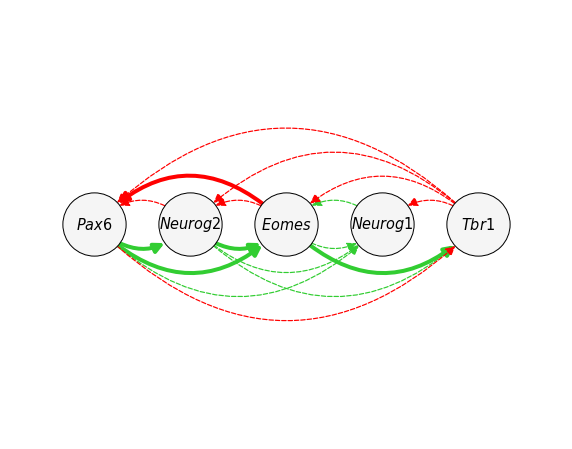

In [26]:
pos = nx.kamada_kawai_layout(DG,weight=None)
pos = {'Pax6':[0,0],'Neurog2':[2,0],'Eomes':[4,0],'Neurog1':[6,0],'Tbr1':[8,0]}

fig = plt.figure(figsize=(10,8))

# nodes
nx.draw_networkx_nodes(DG, pos, node_size=4000, node_color='whitesmoke',edgecolors='k')

edgelist = [(u, v) for (u, v, d) in DG.edges(data=True)]
edges = DG.edges()
colors = [DG[u][v]['color'] for u,v in edges]

styles = []
widths= []
for edge_l in edgelist:
    if edge_l in edgelist_known:
        styles.append('-')
        widths.append(4)
    else:
        styles.append('--')
        widths.append(1.2)

# edges
nx.draw_networkx_edges(DG, pos, edgelist=edgelist, width=widths, edge_color=colors,
                       arrowsize=20,connectionstyle='arc3, rad = 0.5',node_size=4000,
                       style=styles)

# labels
nx.draw_networkx_labels(DG, pos, font_size=14.5, font_family="arial",labels=relabel_map)
xlim=plt.xlim()
ylim=plt.ylim()

plt.axis('off')
plt.xlim(plt.xlim()[0]-(plt.xlim()[1]-plt.xlim()[0])*0.1,plt.xlim()[1]+(plt.xlim()[1]-plt.xlim()[0])*0.1)
plt.ylim(plt.ylim()[0]-(plt.ylim()[1]-plt.ylim()[0])*0.1,plt.ylim()[1]+(plt.ylim()[1]-plt.ylim()[0])*0.1)
plt.savefig('figures_paper_mouse_data/fig1/regulatory_network.pdf',bbox_inches='tight')

In [27]:
#get best fitting genes
mcmc.get_top_genes(n_top=1000,sub_tf=True)

In [28]:
n_non_unif = len([x for x in mcmc.best_fits.items() if x[1] != 'uniform' and x[0] in mcmc.tfs])
n_tfs = len([x for x in mcmc.best_fits if x in mcmc.tfs])
print(n_non_unif,n_tfs,n_non_unif/n_tfs)

60 510 0.11764705882352941


sig down
ENSMUSG00000021318|Gli3
ENSMUSG00000055799|Tcf7l1
ENSMUSG00000000567|Sox9
ENSMUSG00000029249|Rest
ENSMUSG00000022528|Hes1
ENSMUSG00000040857|Erf
ENSMUSG00000066456|Hmgn3
ENSMUSG00000019803|Nr2e1
ENSMUSG00000096014|Sox1
ENSMUSG00000053007|Creb5
ENSMUSG00000074637|Sox2
ENSMUSG00000048001|Hes5
ENSMUSG00000027490|E2f1
ENSMUSG00000027168|Pax6
ENSMUSG00000035277|Arx
ENSMUSG00000028640|Tfap2c
ENSMUSG00000043969|Emx2
ENSMUSG00000022708|Zbtb20
ENSMUSG00000030796|Tead2
ENSMUSG00000051910|Sox6
sig up
ENSMUSG00000038255|Neurod2
ENSMUSG00000001911|Nfix
ENSMUSG00000063632|Sox11
ENSMUSG00000037984|Neurod6
ENSMUSG00000063659|Zbtb18
ENSMUSG00000028565|Nfia
ENSMUSG00000035033|Tbr1
ENSMUSG00000008575|Nfib
ENSMUSG00000035456|Prdm8
ENSMUSG00000025959|Klf7
ENSMUSG00000048251|Bcl11b
ENSMUSG00000000861|Bcl11a
ENSMUSG00000044647|Csrnp3
ENSMUSG00000026872|Zeb2
ENSMUSG00000048385|Scrt1
ENSMUSG00000038331|Satb2
ENSMUSG00000061911|Myt1l
ENSMUSG00000058756|Thra
ENSMUSG00000025128|Bhlhe22
ENSMUSG00000030584

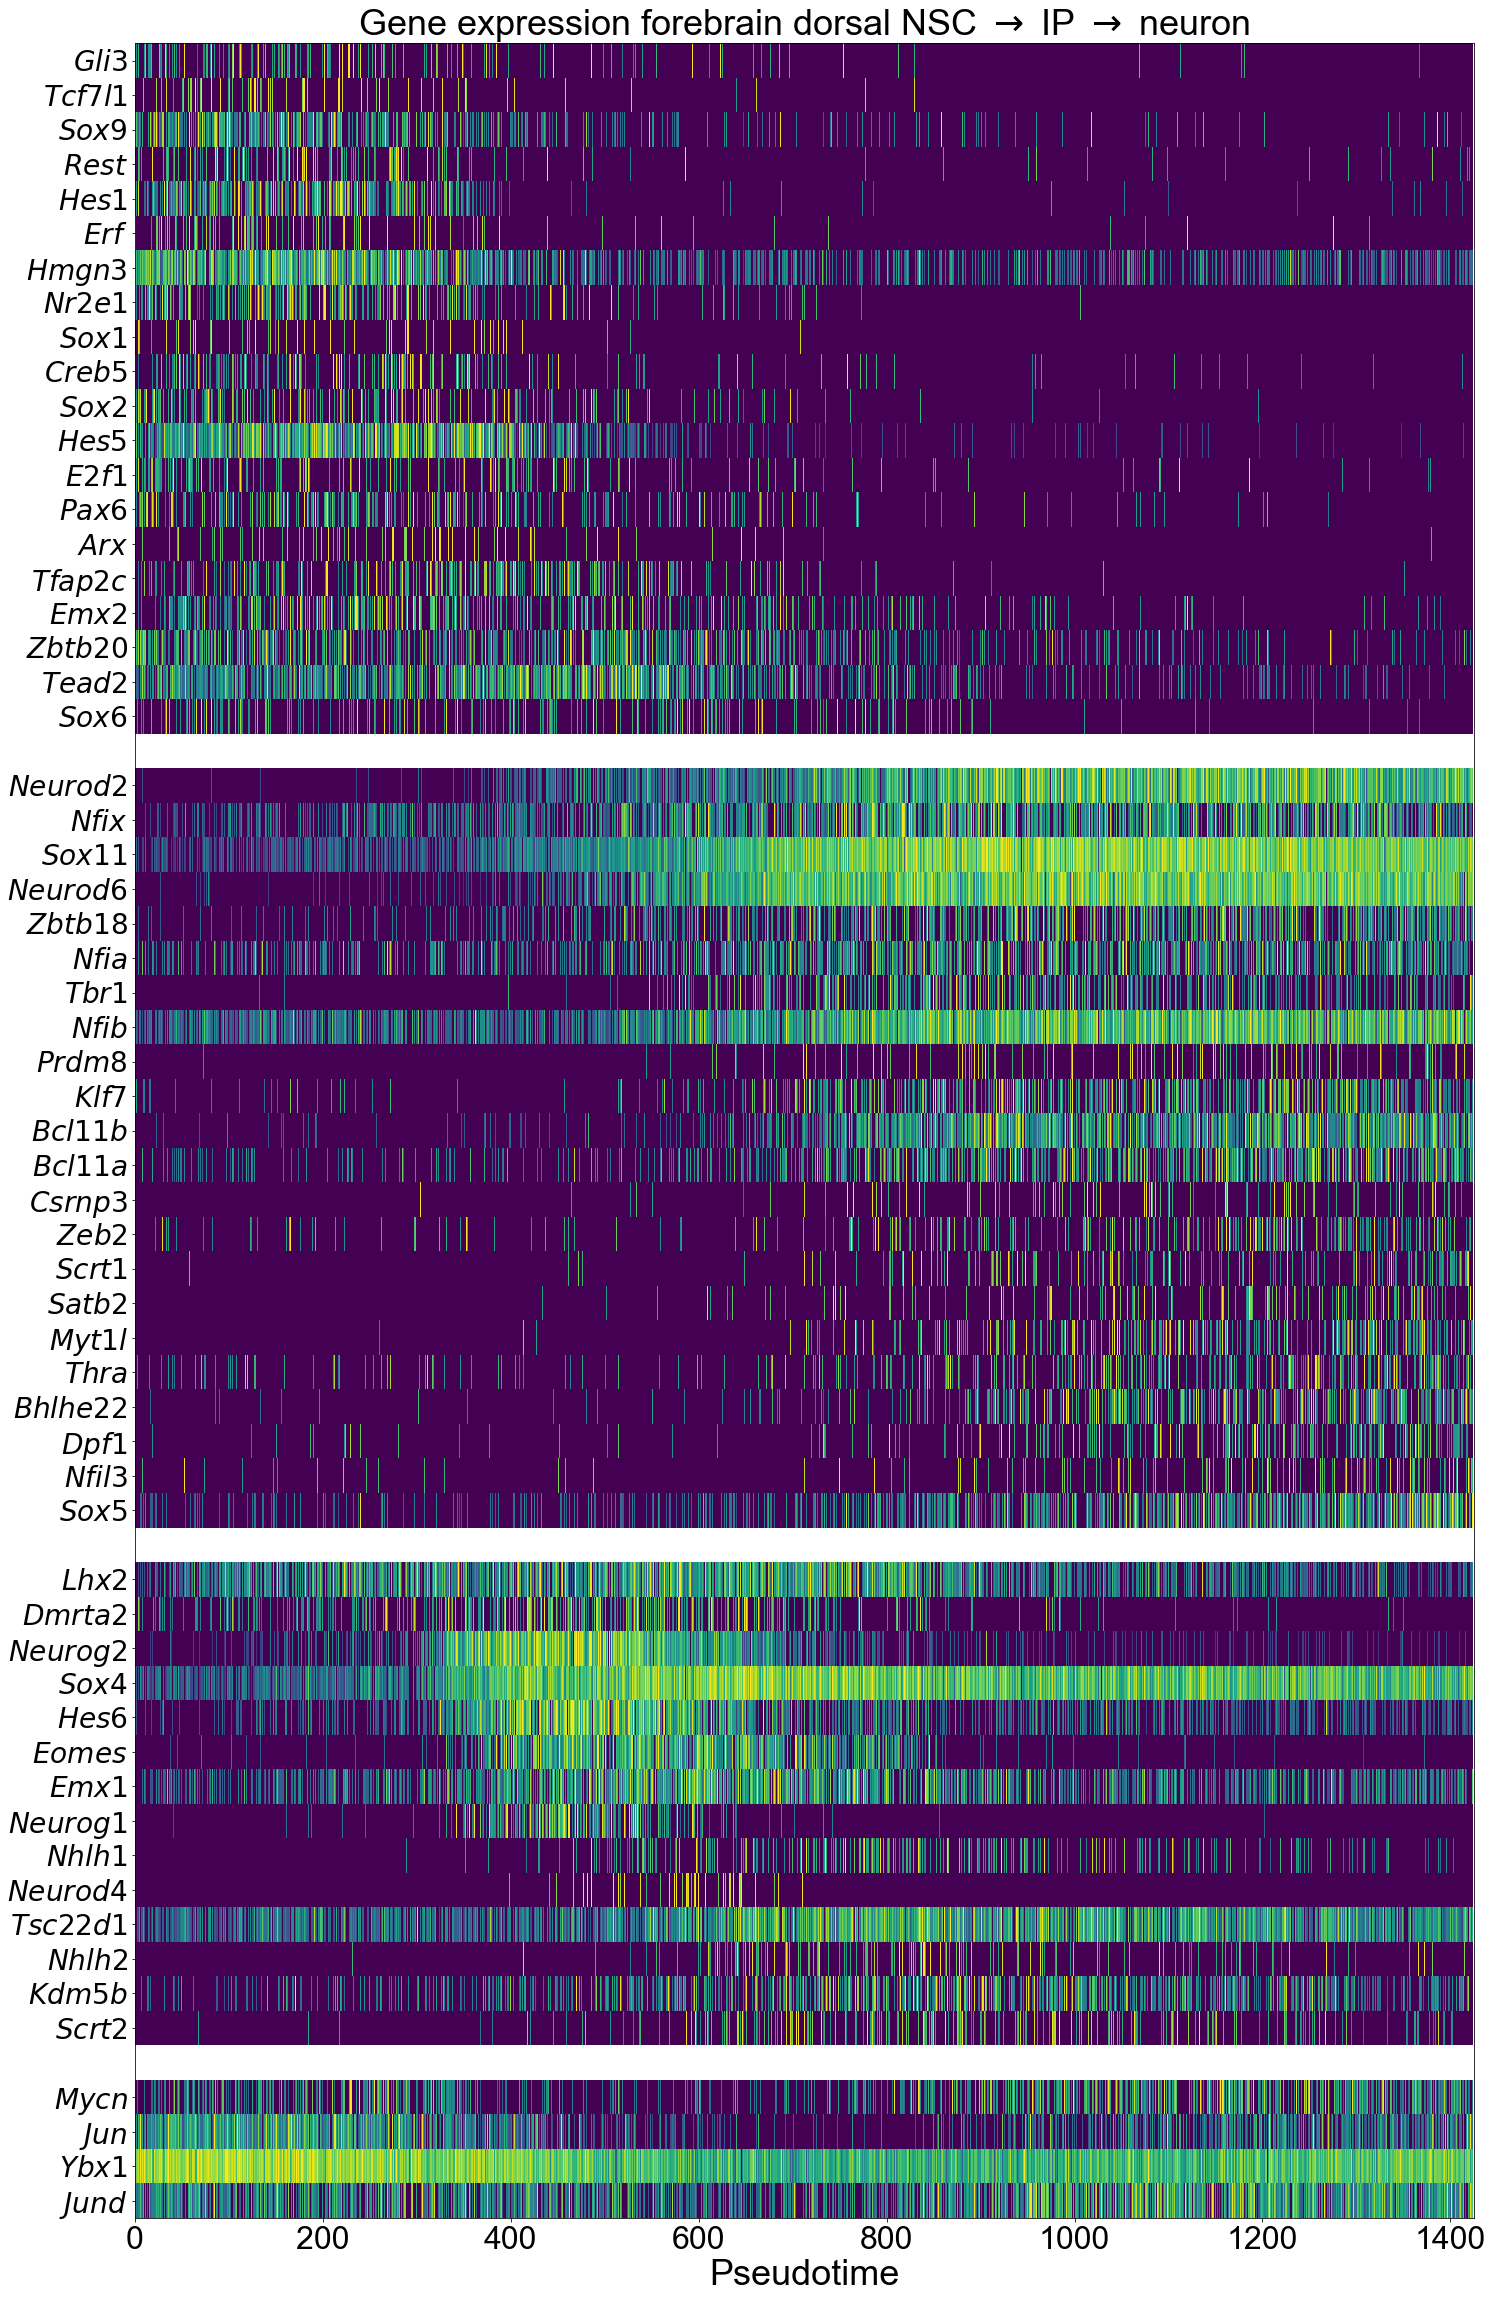

In [29]:
fig = plot_transcriptional_cascade_heatmap_full(mcmc,title=None, tfs=mcmc.genes_good_fit, figsize=(24,40),
                                                cmap=cm.viridis,ytick_fontsize=28,yticks_italics=True)
ax = plt.gca()
plt.xlim(0,len(mcmc.expr_dict[gene_map['Eomes']]))
plt.xticks(fontsize=32)
plt.xlabel('Pseudotime',fontsize=36)
plt.title('Gene expression forebrain dorsal NSC '+r'$\rightarrow$'+' IP '+r'$\rightarrow$'+' neuron',fontsize=36)
plt.savefig('figures_paper_mouse_data/fig2/cortical_transcriptional_cascades.pdf',bbox_inches='tight')

sig down
ENSMUSG00000021318|Gli3
ENSMUSG00000055799|Tcf7l1
ENSMUSG00000000567|Sox9
ENSMUSG00000029249|Rest
ENSMUSG00000022528|Hes1
ENSMUSG00000040857|Erf
ENSMUSG00000066456|Hmgn3
ENSMUSG00000019803|Nr2e1
ENSMUSG00000096014|Sox1
ENSMUSG00000053007|Creb5
ENSMUSG00000074637|Sox2
ENSMUSG00000048001|Hes5
ENSMUSG00000027490|E2f1
ENSMUSG00000027168|Pax6
ENSMUSG00000035277|Arx
ENSMUSG00000028640|Tfap2c
ENSMUSG00000043969|Emx2
ENSMUSG00000022708|Zbtb20
ENSMUSG00000030796|Tead2
ENSMUSG00000051910|Sox6
sig up
ENSMUSG00000038255|Neurod2
ENSMUSG00000001911|Nfix
ENSMUSG00000063632|Sox11
ENSMUSG00000037984|Neurod6
ENSMUSG00000063659|Zbtb18
ENSMUSG00000028565|Nfia
ENSMUSG00000035033|Tbr1
ENSMUSG00000008575|Nfib
ENSMUSG00000035456|Prdm8
ENSMUSG00000025959|Klf7
ENSMUSG00000048251|Bcl11b
ENSMUSG00000000861|Bcl11a
ENSMUSG00000044647|Csrnp3
ENSMUSG00000026872|Zeb2
ENSMUSG00000048385|Scrt1
ENSMUSG00000038331|Satb2
ENSMUSG00000061911|Myt1l
ENSMUSG00000058756|Thra
ENSMUSG00000025128|Bhlhe22
ENSMUSG00000030584

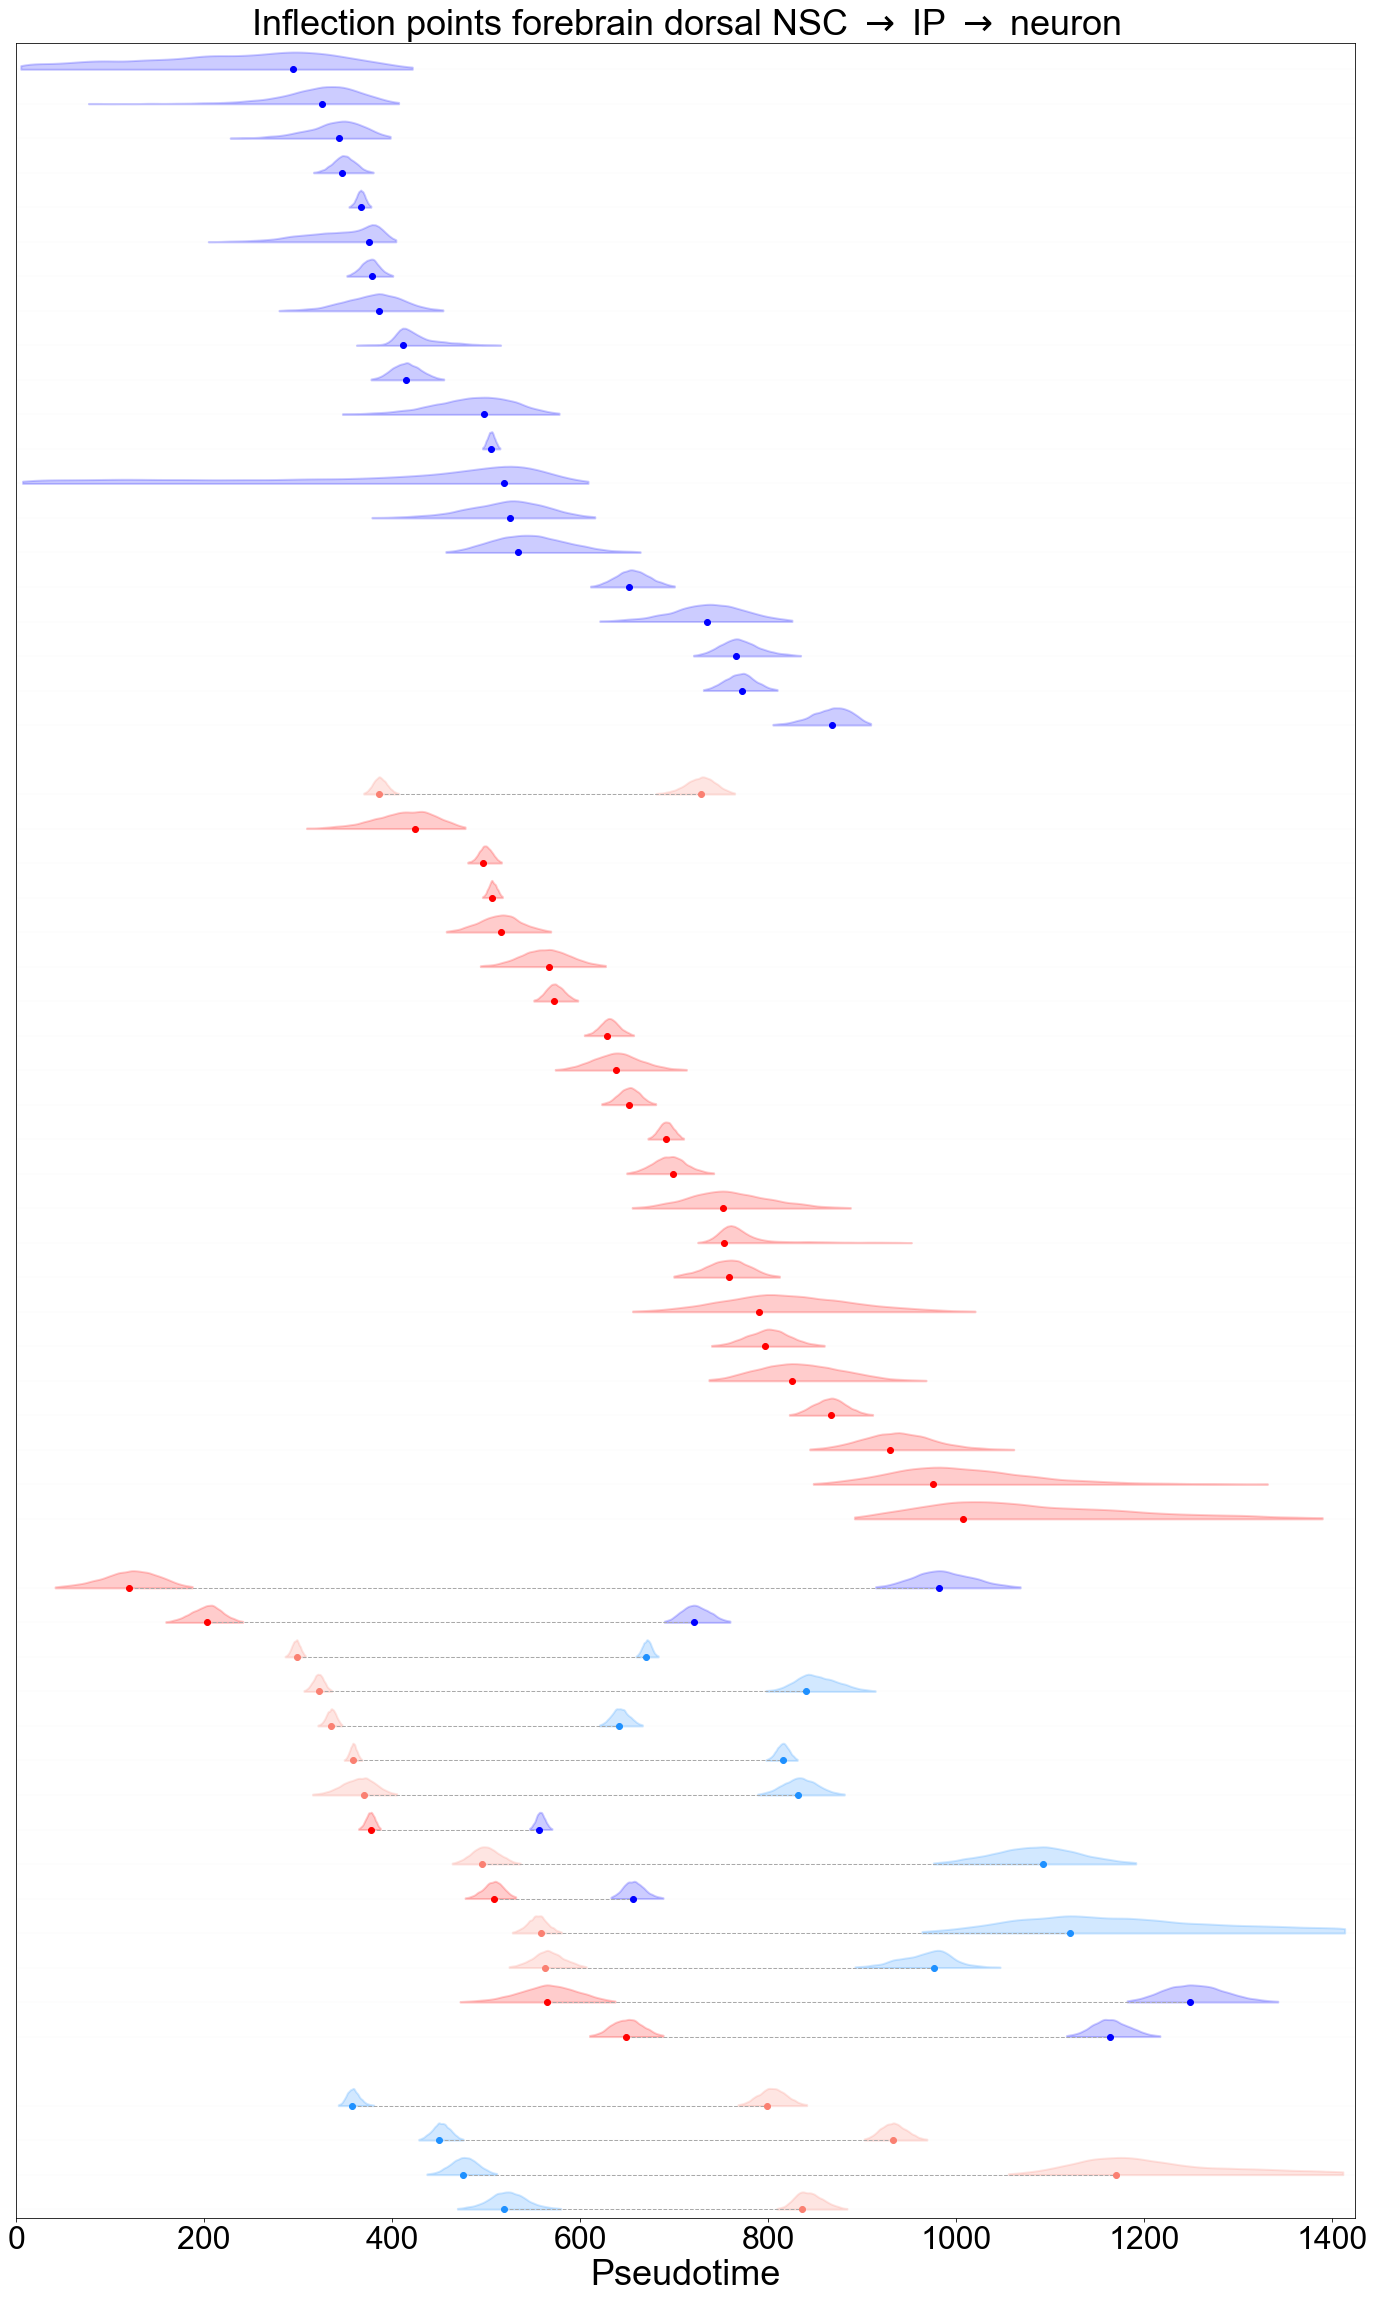

In [30]:
fig = plot_transcriptional_cascade_violins_full(mcmc,title=None, tfs=mcmc.genes_good_fit, figsize=(24,40))
ax = plt.gca()
plt.xlim(0,len(mcmc.expr_dict[gene_map['Eomes']]))
plt.xticks(fontsize=32)
plt.xlabel('Pseudotime',fontsize=36)
plt.title('Inflection points forebrain dorsal NSC '+r'$\rightarrow$'+' IP '+r'$\rightarrow$'+' neuron',fontsize=36)
plt.savefig('figures_paper_mouse_data/fig2/cortical_transcriptional_cascades_violins.pdf',bbox_inches='tight')

In [31]:
n_non_unif_tot = len([x for x in mcmc.best_fits.items() if x[1] != 'uniform'])
n_tot = len(mcmc.best_fits)
print(n_non_unif_tot,n_tot,n_non_unif_tot/n_tot)

722 9530 0.0757607555089192


Text(0.5, 1.0, 'Transcriptional cascade e14.5 forebrain dorsal NSC $\\rightarrow$ IP $\\rightarrow$ neuron')

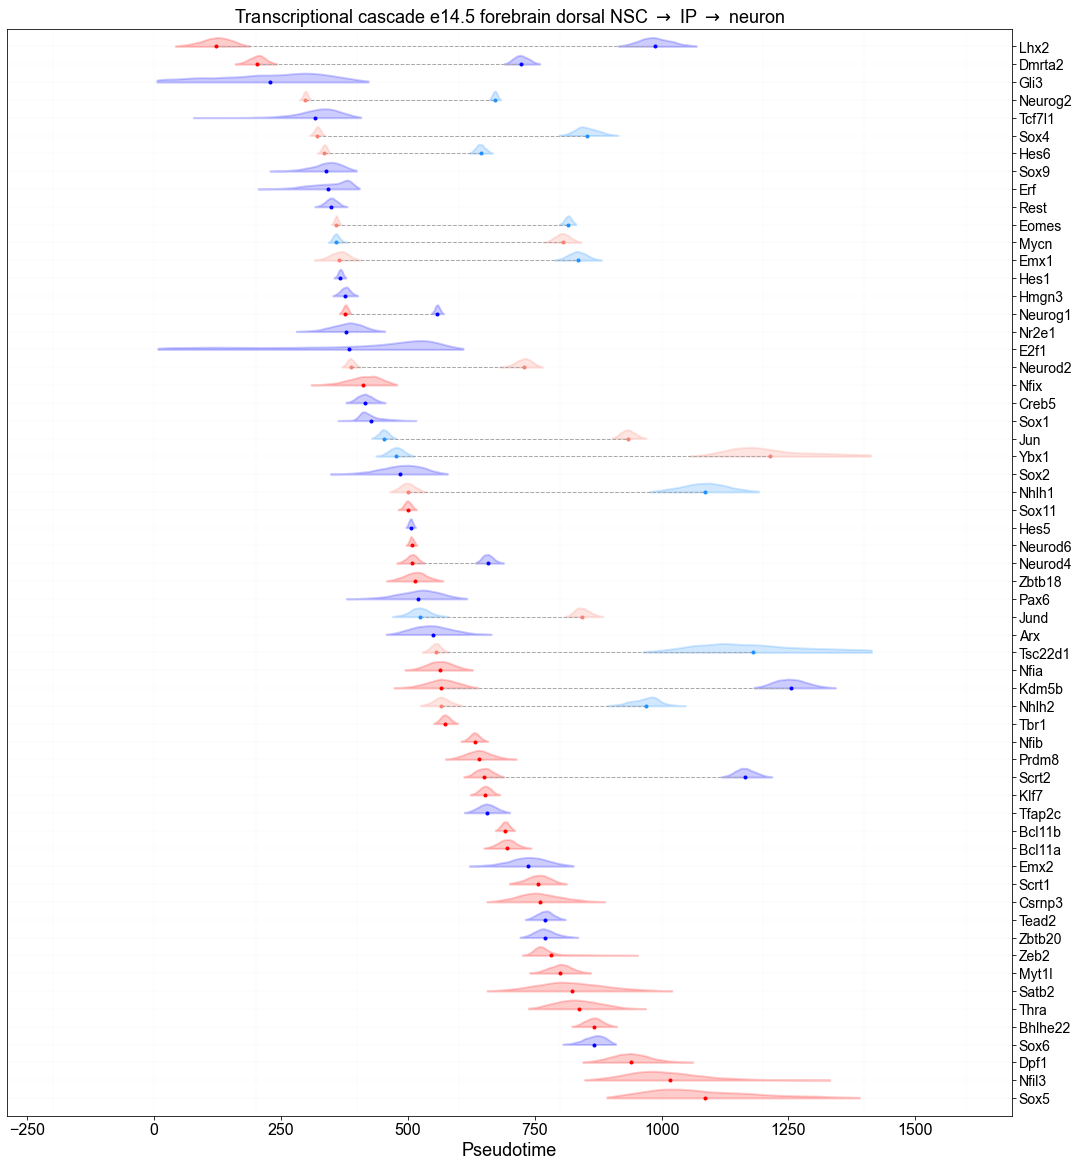

In [32]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,20), tfs=mcmc.genes_good_fit)#, xlim=[0,2200])
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 forebrain dorsal NSC '+r'$\rightarrow$'+' IP '+r'$\rightarrow$'+' neuron',fontsize=18)

In [33]:
mcmc2 = mcmc_data(count_matrix_fn='data/e13_5_mouse_forebrain_neuron_diff.1.raw_count_matrix.tsv',
                          pkl_dir='outputs_full/e13_5_forebrain_dorsal/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

#load in all pkls
mcmc2.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc2.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800


In [34]:
for gene in mcmc2.counts_dict:
    gene_map[gene.split("|")[1]] = gene
    gene_map_r[gene] = gene.split("|")[1]

In [35]:
mcmc2.tfs = [gene_map[x] for x in human_tfs if x in gene_map]

In [36]:
#get best fitting genes
mcmc2.get_top_genes(n_top=100,sub_tf=True)

In [37]:
len(mcmc2.genes_good_fit)

63

Text(0.5, 1.0, 'Transcriptional cascade e14.5 forebrain dorsal NSC $\\rightarrow$ IP $\\rightarrow$ neuron')

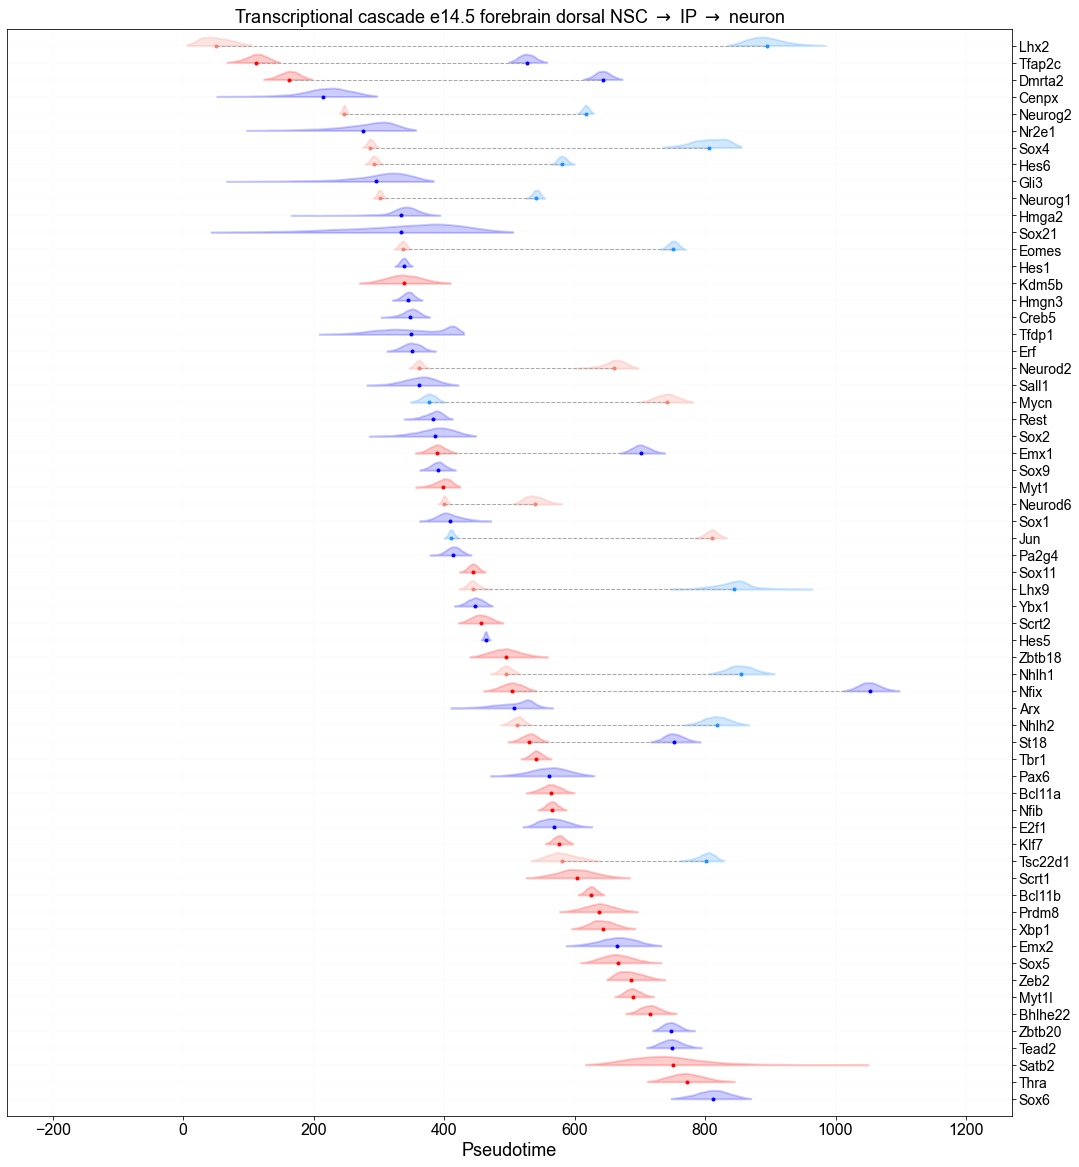

In [38]:
fig = plot_transcriptional_cascade(mcmc2,title=None, figsize=(18,20), tfs=mcmc2.genes_good_fit)#, xlim=[0,2200])
ax = plt.gca()
plt.ylim(-len(mcmc2.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 forebrain dorsal NSC '+r'$\rightarrow$'+' IP '+r'$\rightarrow$'+' neuron',fontsize=18)

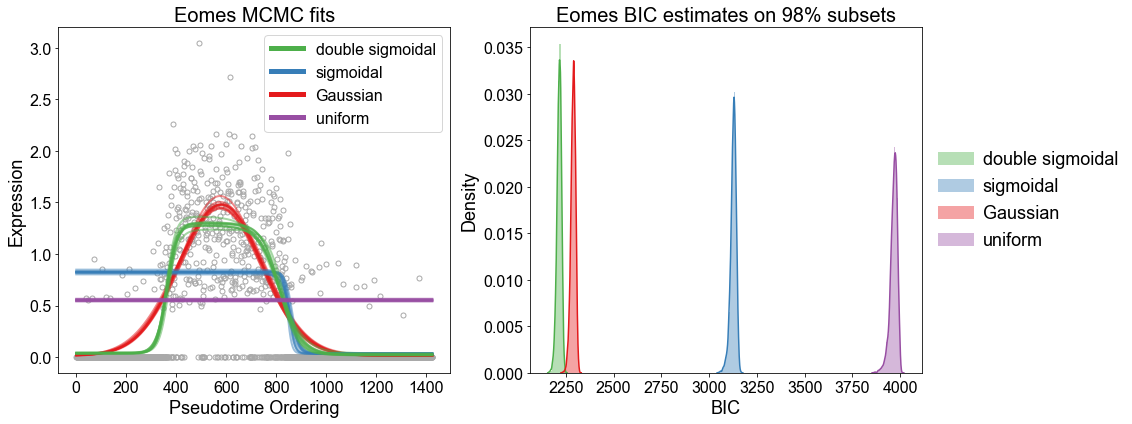

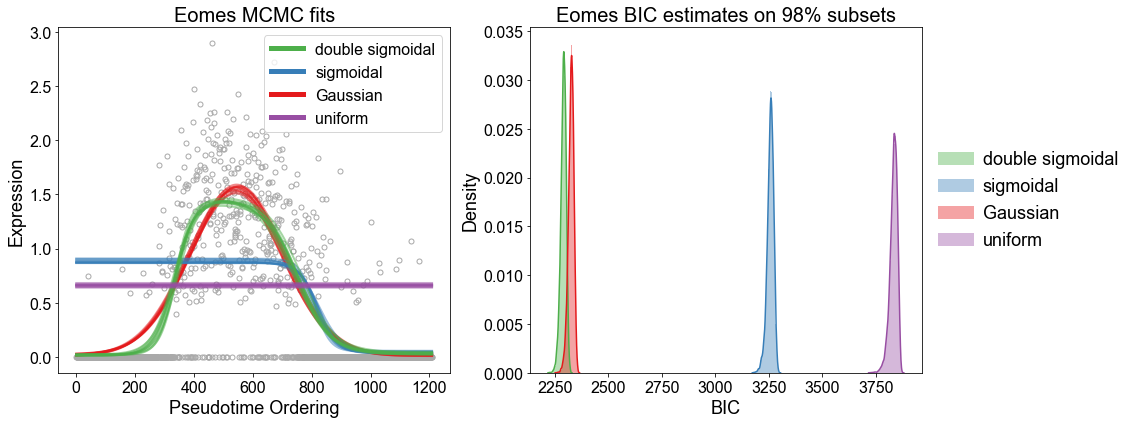

In [39]:
gene = 'Eomes'
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene_map[gene],gene_lab=gene)
fig = make_joint_fit_and_bic_estimate_plot(mcmc2,gene_map[gene],gene_lab=gene)

In [96]:
mcmc.get_top_genes(n_top=10000,sub_tf=False)
mcmc2.get_top_genes(n_top=10000,sub_tf=False)

In [97]:
len(mcmc.genes_good_fit),len(mcmc2.genes_good_fit)

(722, 747)

In [98]:
tfs = set([])
coregs = set([])
with open('../../data/transcriptional_coregulators_siddappa_etal.txt','r') as coreg_fn:
    for i,row in enumerate(coreg_fn):
        if i == 0: continue
        spl = row.strip("\n").split("\t")
        for j,gene in enumerate(spl):
            if gene == 'NA': continue
            if j == 0:
                tfs.add(gene)
            else:
                coregs.add(gene)
tfs = list(tfs)
coregs = list(coregs)

In [99]:
tfs_lambert = []
with open('../../data/transcription_factors_lambert_et_al.txt','r') as tfs_fn:
    for i,row in enumerate(tfs_fn):
        tfs_lambert.append(row.strip("\n"))

In [100]:
coregs_final = [y[0]+y[1:].lower() for y in list(set(coregs).union(set(tfs))-set(tfs_lambert))]

In [101]:
inflec_eomes = mcmc.inflection_points[gene_map['Eomes']]
genes_good_fit_transient_up = []
for j,gene in enumerate(mcmc.genes_good_fit):
    if gene != gene_map['Eomes']:
        if mcmc.inflection_points_2[gene] is None: continue
        if np.mean(mcmc.inflection_point_derivs[gene]) < 0 : continue
        if np.mean(mcmc.inflection_point_derivs_2[gene]) > 0 : continue
        if measure_a_before_b([mcmc.inflection_points[gene],inflec_eomes]) + \
        histogram_intersection([mcmc.inflection_points[gene],inflec_eomes]) > 1e-10:
            genes_good_fit_transient_up.append(gene)

genes_good_fit_up = []
for j,gene in enumerate(mcmc.genes_good_fit):
    if mcmc.best_fits[gene] == 'sigmoidal':
         if np.mean(mcmc.inflection_point_derivs[gene]) < 0 : continue
    elif mcmc.best_fits[gene] == ' double sigmoidal':
        if np.mean(mcmc.inflection_point_derivs[gene]) < 0 : continue
        if np.mean(mcmc.inflection_point_derivs_2[gene]) < 0 : continue
    else:
        continue
    if measure_a_before_b([mcmc.inflection_points[gene],inflec_eomes]) + \
        histogram_intersection([mcmc.inflection_points[gene],inflec_eomes]) > 1e-10:
            genes_good_fit_up.append(gene)
            
genes_good_fit_down = []
for j,gene in enumerate(mcmc.genes_good_fit):
    if mcmc.best_fits[gene] == 'sigmoidal':
         if np.mean(mcmc.inflection_point_derivs[gene]) > 0 : continue
    elif mcmc.best_fits[gene] == ' double sigmoidal':
        if np.mean(mcmc.inflection_point_derivs[gene]) > 0 : continue
        if np.mean(mcmc.inflection_point_derivs_2[gene]) > 0 : continue
    else:
        continue
    if 1-measure_a_before_b([mcmc.inflection_points[gene],inflec_eomes]) + \
    histogram_intersection([mcmc.inflection_points[gene],inflec_eomes]) > 0.95:
            genes_good_fit_down.append(gene)

genes_good_fit_transient_up.append(gene_map['Eomes'])

In [102]:
inflec_eomes = mcmc2.inflection_points[gene_map['Eomes']]
genes_good_fit_transient_up_2 = []
for j,gene in enumerate(mcmc2.genes_good_fit):
    if gene != gene_map['Eomes']:
        if mcmc2.inflection_points_2[gene] is None: continue
        if np.mean(mcmc2.inflection_point_derivs[gene]) < 0 : continue
        if np.mean(mcmc2.inflection_point_derivs_2[gene]) > 0 : continue
        if measure_a_before_b([mcmc2.inflection_points[gene],inflec_eomes]) + \
        histogram_intersection([mcmc2.inflection_points[gene],inflec_eomes]) > 1e-10:
            genes_good_fit_transient_up_2.append(gene)
            
genes_good_fit_up_2 = []
for j,gene in enumerate(mcmc2.genes_good_fit):
    if mcmc2.best_fits[gene] == 'sigmoidal':
         if np.mean(mcmc2.inflection_point_derivs[gene]) < 0 : continue
    elif mcmc2.best_fits[gene] == ' double sigmoidal':
        if np.mean(mcmc2.inflection_point_derivs[gene]) < 0 : continue
        if np.mean(mcmc2.inflection_point_derivs_2[gene]) < 0 : continue
    else:
        continue
    if measure_a_before_b([mcmc2.inflection_points[gene],inflec_eomes]) + \
        histogram_intersection([mcmc2.inflection_points[gene],inflec_eomes]) > 1e-10:
            genes_good_fit_up_2.append(gene)

genes_good_fit_down_2 = []
for j,gene in enumerate(mcmc2.genes_good_fit):
    if mcmc2.best_fits[gene] == 'sigmoidal':
         if np.mean(mcmc2.inflection_point_derivs[gene]) > 0 : continue
    elif mcmc2.best_fits[gene] == ' double sigmoidal':
        if np.mean(mcmc2.inflection_point_derivs[gene]) > 0 : continue
        if np.mean(mcmc2.inflection_point_derivs_2[gene]) > 0 : continue
    else:
        continue
    if 1-measure_a_before_b([mcmc2.inflection_points[gene],inflec_eomes]) + \
    histogram_intersection([mcmc2.inflection_points[gene],inflec_eomes]) > 0.95:
            genes_good_fit_down_2.append(gene)

genes_good_fit_transient_up_2.append(gene_map['Eomes'])

In [103]:
genes_to_include = [gene_map[gene] for gene in list(set([x.split("|")[1] for x in genes_good_fit_transient_up]).intersection(coregs_final))]
genes_good_fit_transient_up = [gene for gene in genes_good_fit_transient_up if gene  in mcmc.tfs]
genes_good_fit_down = [gene for gene in genes_good_fit_down if gene in mcmc.tfs]
genes_good_fit_up = [gene for gene in genes_good_fit_up if gene in mcmc.tfs]
genes_good_fit = list(set(genes_good_fit_transient_up).union(set(genes_good_fit_down)).union(set(genes_to_include)).union(set(genes_good_fit_up)))

In [104]:
genes_to_include

['ENSMUSG00000096210|H1f0',
 'ENSMUSG00000020423|Btg2',
 'ENSMUSG00000006728|Cdk4',
 'ENSMUSG00000052397|Ezr',
 'ENSMUSG00000014773|Dll1',
 'ENSMUSG00000024968|Rcor2',
 'ENSMUSG00000039910|Cited2',
 'ENSMUSG00000041235|Chd7',
 'ENSMUSG00000024608|Rps14']

In [105]:
genes_good_fit

['ENSMUSG00000066456|Hmgn3',
 'ENSMUSG00000052397|Ezr',
 'ENSMUSG00000000247|Lhx2',
 'ENSMUSG00000014773|Dll1',
 'ENSMUSG00000043969|Emx2',
 'ENSMUSG00000027967|Neurog2',
 'ENSMUSG00000024608|Rps14',
 'ENSMUSG00000033726|Emx1',
 'ENSMUSG00000035277|Arx',
 'ENSMUSG00000096014|Sox1',
 'ENSMUSG00000047143|Dmrta2',
 'ENSMUSG00000041235|Chd7',
 'ENSMUSG00000019803|Nr2e1',
 'ENSMUSG00000048001|Hes5',
 'ENSMUSG00000001911|Nfix',
 'ENSMUSG00000048904|Neurog1',
 'ENSMUSG00000096210|H1f0',
 'ENSMUSG00000074637|Sox2',
 'ENSMUSG00000022708|Zbtb20',
 'ENSMUSG00000076431|Sox4',
 'ENSMUSG00000006728|Cdk4',
 'ENSMUSG00000020423|Btg2',
 'ENSMUSG00000024968|Rcor2',
 'ENSMUSG00000039910|Cited2',
 'ENSMUSG00000053007|Creb5',
 'ENSMUSG00000027168|Pax6',
 'ENSMUSG00000067071|Hes6',
 'ENSMUSG00000030796|Tead2',
 'ENSMUSG00000051910|Sox6',
 'ENSMUSG00000028640|Tfap2c',
 'ENSMUSG00000032446|Eomes',
 'ENSMUSG00000022528|Hes1']

In [106]:
genes_to_include_2 = [gene_map[gene] for gene in list(set([x.split("|")[1] for x in genes_good_fit_transient_up_2]).intersection(coregs_final))]
genes_good_fit_transient_up_2 = [gene for gene in genes_good_fit_transient_up_2 if gene in mcmc.tfs]
genes_good_fit_down_2 = [gene for gene in genes_good_fit_down_2 if gene in mcmc.tfs]
genes_good_fit_up_2 = [gene for gene in genes_good_fit_up_2 if gene in mcmc.tfs]
genes_good_fit_2 = list(set(genes_good_fit_transient_up_2).union(set(genes_good_fit_down_2)).union(set(genes_to_include_2)).union(set(genes_good_fit_up_2)))

In [107]:
genes_good_fit_2

['ENSMUSG00000066456|Hmgn3',
 'ENSMUSG00000000247|Lhx2',
 'ENSMUSG00000014773|Dll1',
 'ENSMUSG00000043969|Emx2',
 'ENSMUSG00000027967|Neurog2',
 'ENSMUSG00000033726|Emx1',
 'ENSMUSG00000096014|Sox1',
 'ENSMUSG00000047143|Dmrta2',
 'ENSMUSG00000040857|Erf',
 'ENSMUSG00000027490|E2f1',
 'ENSMUSG00000048001|Hes5',
 'ENSMUSG00000022708|Zbtb20',
 'ENSMUSG00000076431|Sox4',
 'ENSMUSG00000020423|Btg2',
 'ENSMUSG00000067071|Hes6',
 'ENSMUSG00000051910|Sox6',
 'ENSMUSG00000028640|Tfap2c',
 'ENSMUSG00000028639|Ybx1',
 'ENSMUSG00000032446|Eomes',
 'ENSMUSG00000052397|Ezr',
 'ENSMUSG00000056758|Hmga2',
 'ENSMUSG00000010505|Myt1',
 'ENSMUSG00000031665|Sall1',
 'ENSMUSG00000035277|Arx',
 'ENSMUSG00000042207|Kdm5b',
 'ENSMUSG00000029249|Rest',
 'ENSMUSG00000000567|Sox9',
 'ENSMUSG00000041235|Chd7',
 'ENSMUSG00000025364|Pa2g4',
 'ENSMUSG00000048904|Neurog1',
 'ENSMUSG00000074637|Sox2',
 'ENSMUSG00000053007|Creb5',
 'ENSMUSG00000027168|Pax6',
 'ENSMUSG00000038526|Car14',
 'ENSMUSG00000030796|Tead2',
 '

In [108]:
genes_to_include_2

['ENSMUSG00000020423|Btg2',
 'ENSMUSG00000038526|Car14',
 'ENSMUSG00000052397|Ezr',
 'ENSMUSG00000014773|Dll1',
 'ENSMUSG00000024968|Rcor2',
 'ENSMUSG00000041235|Chd7']

In [109]:
len(genes_good_fit),len(genes_good_fit_2),len(set(genes_good_fit_2).intersection(genes_good_fit))

(32, 37, 26)

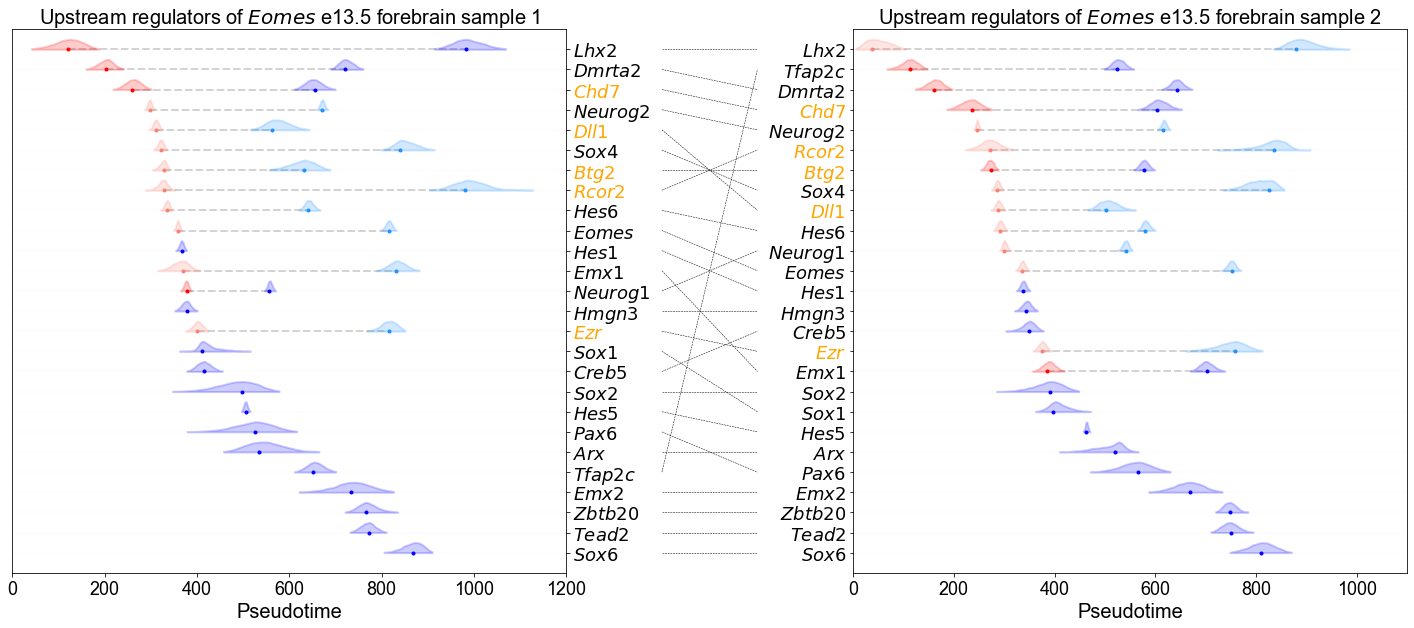

In [110]:
#TODO: make into function
fig = plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(20, 20,wspace=0.1, hspace=0)
ax = plt.subplot(gs[:,:8])

shared_genes = list(set(genes_good_fit).intersection(genes_good_fit_2))

ax,gene_labs = plot_transcriptional_cascade_split(fig,ax,mcmc.inflection_points,mcmc.inflection_points_2,
                                  mcmc.inflection_point_derivs,mcmc.inflection_point_derivs_2,
                                  mcmc.best_fits,mcmc.expr_dict,shared_genes,
                                  title=r'Upstream regulators of $\it{Eomes}$ e13.5 forebrain sample 1', 
                                  xlim=[0,1200], tfs=None, yticks_italics=True)

for ticklabel, tickcolor in zip(ax.get_yticklabels(), ['black' if gene in [gene_map_r[gene_iter] for gene_iter in mcmc.tfs]
                                                       else 'orange' for gene in gene_labs]):
    ticklabel.set_color(tickcolor)
    
plt.ylim(-len(shared_genes),1)

ax = plt.subplot(gs[:,12:])
ax,gene_labs = plot_transcriptional_cascade_split(fig,ax,mcmc2.inflection_points,mcmc2.inflection_points_2,
                                  mcmc2.inflection_point_derivs,mcmc2.inflection_point_derivs_2,
                                  mcmc2.best_fits,mcmc2.expr_dict,shared_genes,
                                  title=r'Upstream regulators of $\it{Eomes}$ e13.5 forebrain sample 2', 
                                  xlim=[0,1100], tfs=None, axlabs='left', yticks_italics=True)
plt.ylim(-len(shared_genes),1)
for ticklabel, tickcolor in zip(ax.get_yticklabels(), ['black' if gene in [gene_map_r[gene_iter] for gene_iter in mcmc2.tfs] 
                                                       else 'orange' for gene in gene_labs]):
    ticklabel.set_color(tickcolor)

ax = plt.subplot(gs[:,9:11])
inflection_points_1_sub = {}
for gene in shared_genes:
    inflection_points_1_sub[gene] = mcmc.inflection_points[gene]
inflection_points_2_sub = {}
for gene in shared_genes:
    inflection_points_2_sub[gene] = mcmc2.inflection_points[gene]
sorted_genes_1 = [y[0] for y in sorted(inflection_points_1_sub.items(),key = lambda x:get_mode(x[1],n_bins=50))]
sorted_genes_2 = [y[0] for y in sorted(inflection_points_2_sub.items(),key = lambda x:get_mode(x[1],n_bins=50))]
for gene1 in sorted_genes_1:
    if gene1 in sorted_genes_2:
        plt.plot([0,1],[-sorted_genes_1.index(gene1),-sorted_genes_2.index(gene1)],'--',linewidth=0.5,color='k')#'lightgray'
plt.xlim([-0.2,1.2])
plt.ylim(-len(shared_genes),1)
plt.axis('off')
plt.savefig('figures_paper_mouse_data/fig3/eomes_upstream_regulators_compare.pdf',bbox_inches='tight',dpi=1000)

Inflec 1 overlap:  p=0.723
Inflec 2 overlap:  p=0.514


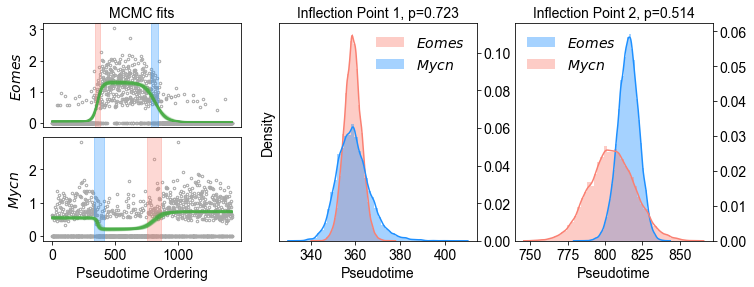

In [111]:
gene1 = gene_map['Eomes']
gene2 = gene_map['Mycn']
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2,yticks1=[0,0.02,0.04,0.06,0.08,0.1],gene_lab1=r'$\it{'+gene_map_r[gene1]+'}$',
                                  gene_lab2=r'$\it{'+gene_map_r[gene2]+'}$')
plt.savefig('figures_paper_mouse_data/fig3/e13.5_exp1_cortical_eomes_mycn_compare.pdf',bbox_inches='tight')

Inflec 1 overlap:  p=0.019
Inflec 2 overlap:  p=0.562


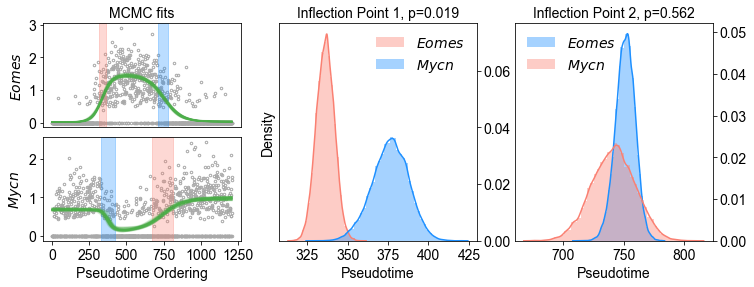

In [112]:
gene1 = gene_map['Eomes']
gene2 = gene_map['Mycn']
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc2,gene1,gene2,yticks1=[0,0.02,0.04,0.06],gene_lab1=r'$\it{'+gene_map_r[gene1]+'}$',
                                  gene_lab2=r'$\it{'+gene_map_r[gene2]+'}$')
plt.savefig('figures_paper_mouse_data/fig3/e13.5_exp2_cortical_eomes_mycn_compare.pdf',bbox_inches='tight')

In [113]:
ligand_receptors = []
lr_pairs = {}
with open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/data/human_lr_pair_celltalk_db.txt','r') as lr_pairs_fn:
    for i,row in enumerate(lr_pairs_fn):
        spl = row.strip("\n").split("\t")
        if i == 0:
            header = spl
            print(header)
        else:
            gene1 = spl[1][0]+spl[1][1:].lower()
            gene2 = spl[2][0]+spl[2][1:].lower()
            if gene1 not in gene_map:
                continue
            if gene2 not in gene_map:
                continue
            ligand_receptors.append(gene_map[gene1])
            ligand_receptors.append(gene_map[gene2])
            if gene1 not in lr_pairs: 
                lr_pairs[gene_map[gene1]] = []
            lr_pairs[gene_map[gene1]].append(gene_map[gene2])

['lr_pair', 'ligand_gene_symbol', 'receptor_gene_symbol', 'ligand_gene_id', 'receptor_gene_id', 'ligand_ensembl_protein_id', 'receptor_ensembl_protein_id', 'ligand_ensembl_gene_id', 'receptor_ensembl_gene_id', 'evidence']


In [114]:
ligand_receptors_to_keep = set([])
'''for ligand in lr_pairs:
    if ligand not in mcmc.best_fits: 
        continue
    if mcmc.best_fits[ligand] != 'uniform':
        for receptor in lr_pairs[ligand]:
            if receptor not in mcmc.best_fits:
                continue
            if mcmc.best_fits[receptor] != 'uniform':
                ligand_receptors_to_keep.add(ligand)
                ligand_receptors_to_keep.add(receptor)
ligand_receptors_to_keep = list(ligand_receptors_to_keep)
'''
for ligand in lr_pairs:
    if ligand not in mcmc.best_fits: 
        continue
    if mcmc.best_fits[ligand] != 'uniform':
        if 'Notch' in ''.join(lr_pairs[ligand]):
            ligand_receptors_to_keep.add(ligand)
            for receptor in lr_pairs[ligand]:
                if 'Notch' in receptor:
                    ligand_receptors_to_keep.add(receptor)

In [115]:
ligand_receptors_to_keep2 = set([])
'''for ligand in lr_pairs:
    if ligand not in mcmc2.best_fits: 
        continue
    if mcmc2.best_fits[ligand] != 'uniform':
        for receptor in lr_pairs[ligand]:
            if receptor not in mcmc2.best_fits:
                continue
            if mcmc2.best_fits[receptor] != 'uniform':
                ligand_receptors_to_keep2.add(ligand)
                ligand_receptors_to_keep2.add(receptor)      
ligand_receptors_to_keep2 = list(ligand_receptors_to_keep2)
'''
for ligand in lr_pairs:
    if ligand not in mcmc2.best_fits: 
        continue
    if mcmc2.best_fits[ligand] != 'uniform':
        if 'Notch' in ''.join(lr_pairs[ligand]):
            ligand_receptors_to_keep2.add(ligand)
            for receptor in lr_pairs[ligand]:
                if 'Notch' in receptor:
                    ligand_receptors_to_keep2.add(receptor)

In [116]:
for gene in ligand_receptors_to_keep2:
    if gene in lr_pairs:
        for gene2 in lr_pairs[gene]:
            if gene2 in ligand_receptors_to_keep2:
                print(gene,gene2)

ENSMUSG00000060572|Mfap2 ENSMUSG00000026923|Notch1
ENSMUSG00000014773|Dll1 ENSMUSG00000026923|Notch1
ENSMUSG00000003436|Dll3 ENSMUSG00000038146|Notch3
ENSMUSG00000018169|Mfng ENSMUSG00000026923|Notch1


In [117]:
#load autocorrelations
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

100 ENSMUSG00000051251|Nhlh1
200 ENSMUSG00000022913|Psmg1
300 ENSMUSG00000043866|Taf10
400 ENSMUSG00000008682|Rpl10
500 ENSMUSG00000059895|Ptp4a3
600 ENSMUSG00000028763|Hspg2
700 ENSMUSG00000026728|Vim
800 ENSMUSG00000040177|2310057M21Rik
900 ENSMUSG00000019927|Ube2d1
1000 ENSMUSG00000029772|Ahcyl2
1100 ENSMUSG00000071281|Zfp65
1200 ENSMUSG00000022948|Setd4
1300 ENSMUSG00000038936|Sccpdh
1400 ENSMUSG00000062014|Gmfb
1500 ENSMUSG00000053289|Ddx10
1600 ENSMUSG00000078532|Nkain1
1700 ENSMUSG00000024507|Hsd17b4
1800 ENSMUSG00000015094|Npdc1
1900 ENSMUSG00000020859|Spag9
2000 ENSMUSG00000024142|Mlst8
2100 ENSMUSG00000027488|Snta1
2200 ENSMUSG00000000326|Comt
2300 ENSMUSG00000042524|Sun2
2400 ENSMUSG00000026643|Nmt2
2500 ENSMUSG00000027339|Rassf2
2600 ENSMUSG00000025204|Ndufb8
2700 ENSMUSG00000018707|Dync1h1
2800 ENSMUSG00000032553|Srprb
2900 ENSMUSG00000036422|Pcdh8
3000 ENSMUSG00000032905|Atg12
3100 ENSMUSG00000052712|BC004004
3200 ENSMUSG00000074781|Ube2n
3300 ENSMUSG00000053565|Eif3k
340

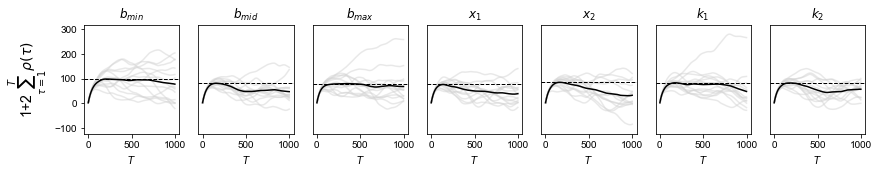

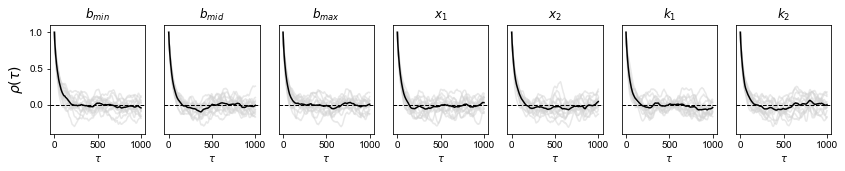

In [118]:
gene = gene_map['Eomes']
fig = plot_autocorr_time_esimates(mcmc,gene,autocorrelations)
plt.savefig('figures_paper_mouse_data/supp_figures/autocorrelation_time.pdf',bbox_inches='tight')
fig = plot_autocorrelation_func(mcmc,gene,autocorrelations)
plt.savefig('figures_paper_mouse_data/supp_figures/autocorrelation_func.pdf',bbox_inches='tight')

In [119]:
autocorrelations[gene]['autocorr_time_estimates'],min(autocorrelations[gene]['autocorr_time_estimates']),max(autocorrelations[gene]['autocorr_time_estimates'])

([98.5349430844685,
  81.49604449466742,
  80.11890621897935,
  76.61081004085952,
  85.34475016521742,
  83.35326035985581,
  82.53090147512357],
 76.61081004085952,
 98.5349430844685)

In [120]:
np.mean(autocorrelations[gene]['autocorr_time_estimates'])

83.99851654845308

In [121]:
5000*14/np.mean(autocorrelations[gene]['autocorr_time_estimates']) #n_kept_mcmc_iter = 5000, n_kept_walkers = 14 (for double sigmoidal)

833.3480503744577

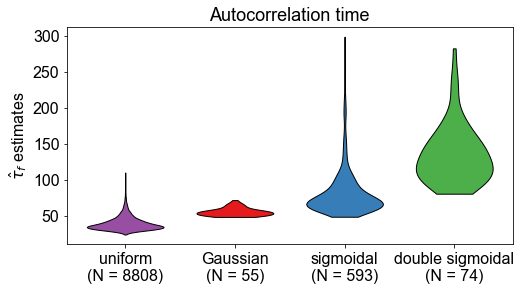

In [125]:
fig = make_autocorrelation_full_plot(mcmc,autocorrelations)
plt.savefig('figures_paper_mouse_data/supp_figures/autocorrelation_time_estimates_all_genes.pdf',bbox_inches='tight')

In [126]:
g23_cortical_adata = pkl.load(open('data/e13.5_forebrain_dorsal_traj_adata_g23.pkl','rb')) #mcmc1
g9_cortical_adata = pkl.load(open('data/e13.5_forebrain_dorsal_traj_adata_g9.pkl','rb')) #mcmc2

In [127]:
g23_celltypes = list(g23_cortical_adata.obs.sort_values(by='dpt_pseudotime')['cell_type_fine'])
g9_celltypes = list(g9_cortical_adata.obs.sort_values(by='dpt_pseudotime')['cell_type_fine'])

In [128]:
from matplotlib.colors import Normalize
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0, vmax=20)

clrs_dict = {'Forebrain Dorsal NSC':cm.tab20b(norm(3)),
              'Forebrain Dorsal IP':cm.tab20b(norm(14)),
              'Forebrain Dorsal Neuron':cm.tab20b(norm(16))}

Mfap2
Dll1
Mfng
Dll3
Notch1


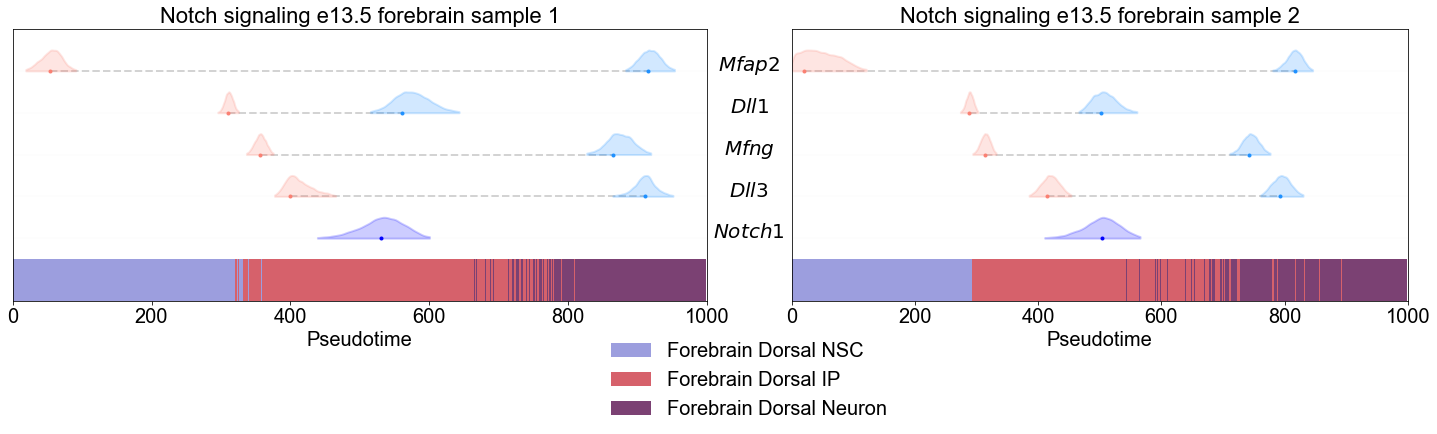

In [130]:
fig = plt.figure(figsize=(25,5))
gs = gridspec.GridSpec(20, 18,wspace=0.1, hspace=0)
ax = plt.subplot(gs[:,:9])

shared_genes = [gene_map['Mfap2'], gene_map['Dll1'],gene_map['Mfng'],gene_map['Dll3'],gene_map['Notch1']]

ax = plot_transcriptional_cascade_split(fig,ax,mcmc.inflection_points,mcmc.inflection_points_2,
                                  mcmc.inflection_point_derivs,mcmc.inflection_point_derivs_2,
                                  mcmc.best_fits,mcmc.expr_dict,shared_genes,
                                  xlim=(0,1000),tfs=None,
                                  order=shared_genes)
plt.yticks([])

for ii in range(0,1000):
    plt.bar(ii,1,bottom=-len(shared_genes)-0.5,color=clrs_dict[g23_celltypes[ii]],width=1)

plt.ylim(-len(shared_genes)-0.5,1)
plt.title('Notch signaling e13.5 forebrain sample 1',fontsize=22)
plt.xticks(fontsize=20)
plt.xlabel('Pseudotime',fontsize=20)

ax = plt.subplot(gs[:,10:])
ax = plot_transcriptional_cascade_split(fig,ax,mcmc2.inflection_points,mcmc2.inflection_points_2,
                                  mcmc2.inflection_point_derivs,mcmc2.inflection_point_derivs_2,
                                  mcmc2.best_fits,mcmc2.expr_dict,shared_genes,
                                  xlim=(0,1000), tfs=None, axlabs='left',
                                  order=shared_genes)
plt.yticks([])
plt.title('Notch signaling e13.5 forebrain sample 2',fontsize=22)

for ii in range(0,1000):
    plt.bar(ii,1,bottom=-len(shared_genes)-0.5,color=clrs_dict[g9_celltypes[ii]],width=1)

plt.ylim(-len(shared_genes)-0.5,1)
plt.xticks(fontsize=20)
plt.xlabel('Pseudotime',fontsize=20)

ax = plt.subplot(gs[:,9])
for j,gene in enumerate(shared_genes):
    print(gene_map_r[gene])
    plt.annotate(r'$\it{'+gene_map_r[gene]+'}$',xy=(0,-j),fontsize=20,ha='center')
plt.ylim(-len(shared_genes)-0.5,1)
plt.xlim(-0.3,0.3)
plt.axis('off')

for cell_type in ['Forebrain Dorsal NSC','Forebrain Dorsal IP','Forebrain Dorsal Neuron']:
    plt.bar(-100,0,color=clrs_dict[cell_type],label=cell_type)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5),fontsize=20,edgecolor='None',handletextpad=0.8)
plt.savefig('figures_paper_mouse_data/fig4/notch_signaling.pdf',bbox_inches='tight')